# ProyectoDSParteI_Sole

**Proyecto:** Análisis exploratorio y visualizaciones — Bitcoin (precios históricos)



---

**Presentación**

Este trabajo presenta un análisis exploratorio y visualizaciones del comportamiento de los precios históricos de Bitcoin, con el objetivo de responder preguntas relacionadas con la dinámica precio-volumen, la volatilidad y la presencia de datos faltantes. El dataset contiene observaciones diarias con variables económicas relevantes: precio de apertura (open), máximo (high), mínimo (low), precio de cierre (close), volumen negociado (volume), capitalización de mercado (marketCap) y marca de tiempo. En la primera entrega se realiza la limpieza inicial, la identificación de valores faltantes y la generación de gráficos univariados, bivariados y multivariados. Las visualizaciones incluyen histogramas de precios, diagramas de dispersión que relacionan precio, volumen y capitalización (usando tamaño de punto), y series temporales con medias móviles para evidenciar tendencias. Se complementa con resúmenes numéricos (media, mediana, desviación estándar) y un diagnóstico simple de la calidad de los datos. El enfoque es práctico y orientado a interpretar los gráficos para responder hipótesis sobre si el volumen anticipa movimientos de precio, cómo varía la volatilidad en el período analizado y si existen huecos de información que puedan afectar los resultados. El notebook incluye comentarios y celdas explicativas cortas para facilitar la lectura y permitir aplicar ajustes rápidos antes de la entrega final.

## Preguntas e hipótesis

**Preguntas de interés**
1. ¿Existe una relación entre volumen y cambios en el precio de cierre diario?
2. ¿Cómo se comporta la volatilidad durante el periodo del dataset?
3. ¿Hay valores faltantes u observaciones anómalas que deban limpiarse antes de un análisis más profundo?

**Hipótesis (ejemplos)**
- H1: Aumentos atípicos en volumen preceden movimientos significativos en precio (cambios porcentuales altos).
- H2: La volatilidad (medida por la desviación de retornos) muestra picos que coinciden con grandes variaciones de precio.
- H3: Existen valores faltantes en columnas derivadas (marketCap, volume) que requieren imputación o eliminación.


In [ ]:
# Carga de datos
import pandas as pd
csv_path = r'/content/Bitcoin_25_9_2025-26_11_2025_historical_data_coinmarketcap.csv'

df = pd.read_csv(csv_path, sep=';')
# Mostrar las primeras filas
df.head()

,timeOpen,timeClose,timeHigh,timeLow,name,open,high,low,close,volume,marketCap,circulatingSupply,timestamp
0,2025-11-25T00:00:00.000Z,2025-11-25T23:59:59.999Z,2025-11-25T04:56:00.000Z,2025-11-25T14:52:00.000Z,2781,88269.957868,88457.333383,86131.428900,87341.893751,6.483734e+10,1.742845e+12,19953446,2025-11-25T23:59:59.999Z
1,2025-11-24T00:00:00.000Z,2025-11-24T23:59:59.999Z,2025-11-24T20:56:00.000Z,2025-11-24T14:51:00.000Z,2781,86798.771310,89206.335346,85272.196164,88270.561974,7.443390e+10,1.761274e+12,19953268,2025-11-24T23:59:59.999Z
2,2025-11-23T00:00:00.000Z,2025-11-23T23:59:59.999Z,2025-11-23T23:01:00.000Z,2025-11-23T00:02:00.000Z,2781,84648.608619,88038.468198,84641.773962,86805.008076,5.808344e+10,1.731864e+12,19952637,2025-11-23T23:59:59.999Z
3,2025-11-22T00:00:00.000Z,2025-11-22T23:59:59.999Z,2025-11-22T00:16:00.000Z,2025-11-22T10:55:00.000Z,2781,85098.565920,85503.010196,83490.901261,84648.356729,4.079310e+10,1.688943e+12,19952396,2025-11-22T23:59:59.999Z
4,2025-11-21T00:00:00.000Z,2025-11-21T23:59:59.999Z,2025-11-21T00:40:00.000Z,2025-11-21T12:30:00.000Z,2781,86528.772761,87380.807905,80659.812426,85090.686114,1.291575e+11,1.697767e+12,19950600,2025-11-21T23:59:59.999Z


In [ ]:
# Limpieza inicial y parseo de fechas
import numpy as np

# Inspección rápida de columnas
print('Columnas originales:', df.columns.tolist())

# Normalizar nombres (el CSV trae varios campos, algunos con nombres claros)
df = df.rename(columns=lambda x: x.strip())

# Intento de parseo de fecha:
possible_date_cols = [c for c in df.columns if 'time' in c.lower() or 'date' in c.lower() or 'timestamp' in c.lower()]
print('Posibles columnas de fecha detectadas:', possible_date_cols)


date_col = None
for c in possible_date_cols:
    if 'open' in c.lower() or 'timeopen' in c.lower() or 'timestamp' in c.lower():
        date_col = c
        break
if date_col is None and len(possible_date_cols)>0:
    date_col = possible_date_cols[0]

if date_col is not None:
    # Limpiar comillas si existen y parsear
    df[date_col] = df[date_col].astype(str).str.replace('"','').str.split('T').str[0]
    df['date'] = pd.to_datetime(df[date_col], errors='coerce').dt.date
else:
    # Si no se detectó, dejamos intentarlo sobre la primera columna
    df['date'] = pd.to_datetime(df.iloc[:,0].astype(str).str.split('T').str[0], errors='coerce').dt.date

# Mostrar conteo y tipos
print(df[['date']].head())
print('\nTipos de datos:\n', df.dtypes)

Columnas originales: ['timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'name', 'open', 'high', 'low', 'close', 'volume', 'marketCap', 'circulatingSupply', 'timestamp']
Posibles columnas de fecha detectadas: ['timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'timestamp']
         date
0  2025-11-25
1  2025-11-24
2  2025-11-23
3  2025-11-22
4  2025-11-21

Tipos de datos:
 timeOpen              object
timeClose             object
timeHigh              object
timeLow               object
name                   int64
open                 float64
high                 float64
low                  float64
close                float64
volume               float64
marketCap            float64
circulatingSupply      int64
timestamp             object
date                  object
dtype: object


In [ ]:
# Convertir columnas numéricas que vienen como strings con comillas o separadores
def to_numeric_col(col):
    return (df[col].astype(str)
            .str.replace('"','')
            .str.replace(',','')
            .str.replace('$','')
            .str.replace(' ','')
            .replace('', pd.NA)
           )

num_cols_guess = ['open','high','low','close','volume','marketCap']
for c in num_cols_guess:
    if c in df.columns:
        df[c] = pd.to_numeric(to_numeric_col(c), errors='coerce')

# Mostrar resumen numérico
df[num_cols_guess].describe(include='all')

,open,high,low,close,volume,marketCap
count,398.000000,398.000000,398.000000,398.000000,3.980000e+02,3.980000e+02
mean,100666.040773,102312.996206,98919.979387,100718.300428,5.528599e+10,2.000983e+12
std,12728.564188,12577.155648,12796.212661,12630.630098,2.563257e+10,2.541802e+11
min,66628.737004,67317.918160,65521.793451,66642.410730,9.863214e+09,1.317386e+12
25%,93708.122865,95179.455352,91638.800827,93713.046567,3.734962e+10,1.860640e+12
50%,102153.726234,104150.461915,100072.749255,102082.888454,5.155519e+10,2.027051e+12
75%,110251.678662,111831.621979,108733.975933,110249.102718,6.987658e+10,2.194968e+12
max,124752.139724,126198.069603,123196.048902,124752.528352,1.817464e+11,2.486340e+12


In [ ]:
# Detección de valores nulos y resumen
nulos = df.isna().sum()
total = len(df)
nulos_df = pd.DataFrame({'missing_count': nulos, 'missing_pct': (nulos/total*100).round(2)})
nulos_df = nulos_df.sort_values('missing_pct', ascending=False)
nulos_df.head(20)

,missing_count,missing_pct
timeOpen,0,0.0
timeClose,0,0.0
timeHigh,0,0.0
timeLow,0,0.0
name,0,0.0
open,0,0.0
high,0,0.0
low,0,0.0
close,0,0.0
volume,0,0.0


In [ ]:
# Columnas derivadas para análisis
df = df.sort_values('date').reset_index(drop=True)
# Retorno diario (porcentaje)
if 'close' in df.columns:
    df['close_prev'] = df['close'].shift(1)
    df['daily_return_pct'] = (df['close'] - df['close_prev']) / df['close_prev'] * 100
# Volatilidad rolling (std de retornos)
df['rolling_vol_7d'] = df['daily_return_pct'].rolling(7).std()
df[['date','close','daily_return_pct','rolling_vol_7d']].head(10)

,date,close,daily_return_pct,rolling_vol_7d
0,2024-10-24,68161.053338,NaN,NaN
1,2024-10-25,66642.410730,-2.228021,NaN
2,2024-10-26,67014.697728,0.558634,NaN
3,2024-10-27,67929.298796,1.364777,NaN
4,2024-10-28,69907.754674,2.912522,NaN
5,2024-10-29,72720.493575,4.023501,NaN
6,2024-10-30,72339.542181,-0.523857,NaN
7,2024-10-31,70215.185633,-2.936646,2.558386
8,2024-11-01,69482.469851,-1.043529,2.384791
9,2024-11-02,69289.276666,-0.278046,2.409349


## Visualizaciones

En las siguientes celdas se incluyen gráficos univariados, bivariados y multivariados.
Se utiliza matplotlib (estilo por defecto). Ejecutá las celdas en tu entorno para ver las figuras.


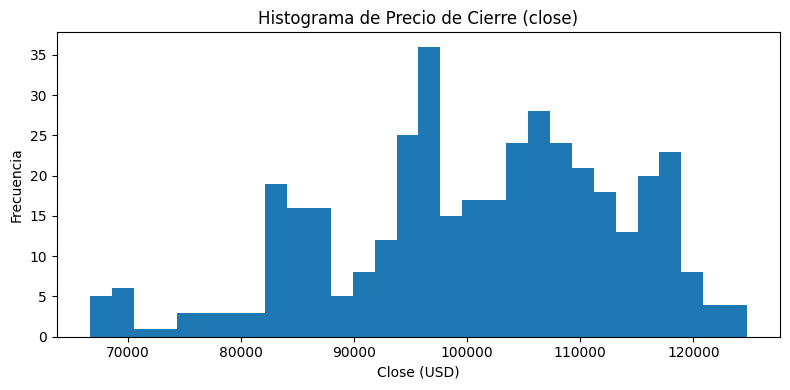

In [ ]:
# Histograma: Precio de cierre (univariado)
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.hist(df['close'].dropna(), bins=30)
plt.title('Histograma de Precio de Cierre (close)')
plt.xlabel('Close (USD)')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

In [ ]:
# Scatter (multivariado): close vs volume, tamaño por marketCap
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
# Filtrar nulos
sub = df.dropna(subset=['close','volume','marketCap'])
sizes = (sub['marketCap'] / sub['marketCap'].median()).clip(0.1, 10) * 20
plt.scatter(sub['close'], sub['volume'], s=sizes, alpha=0.6)
plt.title('Close vs Volume (tamaño ~ marketCap)')
plt.xlabel('Close (USD)')
plt.ylabel('Volume')
plt.tight_layout()
plt.show()

In [ ]:
# Serie temporal: Close + Media Móvil 30 días
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
ser = df.dropna(subset=['date','close']).set_index(pd.to_datetime(df['date']))
ser['close'] = ser['close'].astype(float)
ser['ma30'] = ser['close'].rolling(30).mean()
plt.plot(ser.index, ser['close'], label='Close')
plt.plot(ser.index, ser['ma30'], label='MA30')
plt.title('Serie Temporal: Precio de Cierre y Media Móvil 30 días')
plt.xlabel('Fecha')
plt.ylabel('Close (USD)')
plt.legend()
plt.tight_layout()
plt.show()

## Resúmenes numéricos e interpretación (claro y simple)

- Se provee un descriptivo (media, mediana, std) para las columnas numéricas principales.
- Se incluyen retornos diarios y una medida simple de volatilidad (rolling std 7 días).

Las interpretaciones sugeridas se incluyen como comentarios en las celdas y podrás editarlas para agregar tu 'toque'.


In [ ]:
# Resumen numérico
num_cols = ['open','high','low','close','volume','marketCap','daily_return_pct','rolling_vol_7d']
available = [c for c in num_cols if c in df.columns]
df[available].describe().T

## Conclusiones preliminares y próximos pasos

- Verificar y tratar filas con valores faltantes antes de análisis predictivos.
- Investigar valores atípicos en volumen y precios (outliers) antes de modelado.
- Para la entrega final sumaremos: regresiones, modelos de series de tiempo (ARIMA/Prophet) o análisis de eventos (p. ej. anuncios relevantes).

---

